<a href="https://colab.research.google.com/github/Kartikkhati/Diabetes-predictor/blob/main/untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

now we need to data collection and analysis

In [ ]:
#loading the data set to a pandas dataframe
diabetes_dataset= pd.read_csv('/content/diabetes.csv')

In [ ]:
#printing the first 5 rows of the dataset

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape


(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#seprating the data and the labels
X = diabetes_dataset.drop(columns='Outcome', axis = 1 )
Y = diabetes_dataset['Outcome']

data standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data

train and test split

In [ ]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2 , stratify =Y ,random_state =2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


training the model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector machine
classifier.fit(X_train , Y_train)

SVC(kernel='linear')

evaluate the model

In [ ]:
#accuracy score in the training data
X_train_predicition =classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predicition,Y_train)

In [ ]:
print("accuracy_score of the training data :",training_data_accuracy)

accuracy_score of the training data : 0.7866449511400652


In [ ]:
#accuracy score in the test data
X_test_predicition =classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predicition,Y_test)

In [ ]:
print("accuracy score in the test data : ",testing_data_accuracy)

accuracy score in the test data :  0.7727272727272727


making a predictive system

In [ ]:
input_data= (0,89,66,23,94,28.1,0.167,21)

#changing the dataset to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data= scaler.transform(input_data_reshaped)
print(std_data)


prediction=classifier.predict(std_data)

print(prediction)


if(prediction[0] == 0):
    print("This Person is not Diabetic")

else:
    print("This Person is Diabetic")


[[-1.14185152 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]
[0]
This Person is not Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(Y_test, X_test_predicition)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_predicition))


Confusion Matrix:
 [[91  9]
 [26 28]]

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, Y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation accuracies: [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Mean CV accuracy: 0.7734827264239028


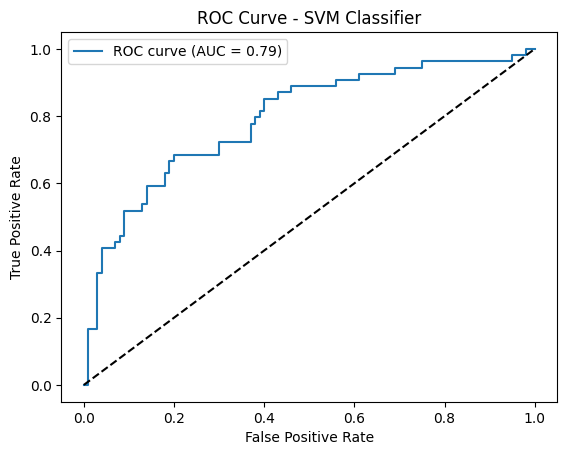

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get decision scores
y_scores = classifier.decision_function(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Classifier")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_lr))
print(classification_report(Y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [ ]:
feature_names = diabetes_dataset.drop(columns='Outcome').columns

importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg.coef_[0]
})

print(importance.sort_values(by='Coefficient', ascending=False))


                    Feature  Coefficient
1                   Glucose     1.190912
5                       BMI     0.774421
0               Pregnancies     0.393342
6  DiabetesPedigreeFunction     0.373535
7                       Age     0.175998
3             SkinThickness     0.053090
2             BloodPressure    -0.236784
4                   Insulin    -0.243708


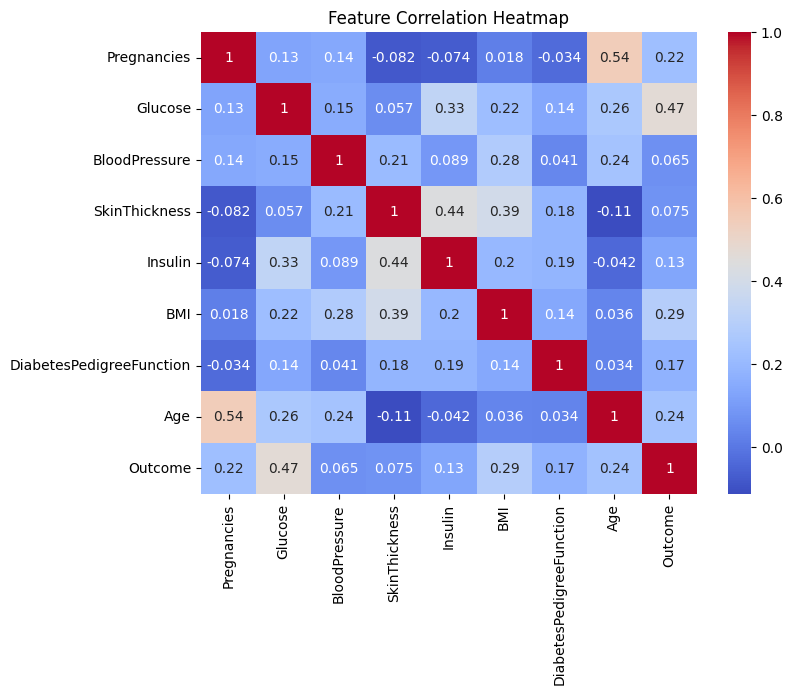

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
